# 3. Análisis exploratorio - Detección de noticias falsas

José Luis Aguilera Luzania

## Introducción

**¿Qué es la detección de *Fake News*?**
La detección de noticias falsas (Fake News) es la tarea de evaluar la veracidad de las afirmaciones en las noticias. Este es un problema crítico en el Procesamiento del Lenguaje Natural (PLN) porque tanto en medios de noticias tradicionales como en medios digitales las Fake News generan un gran impacto social y político en cada individuo. Por ejemplo, la exposición a las Fake News puede generar actitudes de ineficacia, alienación y cinismo hacia ciertos candidatos políticos (Balmas, 2014).

**Objetivo de la libreta**
El objetivo de esta libreta es conocer mejor los datos, no solo su estructura, sino su comportamiento y características que sean útiles.

## Análisis de los datos

**Librerías**
- Manipulación de datos:
    - `pandas`: Librería para manipular los datos de forma tabular.
    - `matplotlib`: Librería para graficar.
    - `cmd`: Librería para controlar el formato de impresión en la consola.
    - `re`: Librería para utilizar expresiones regulares.
    
- Procesamiento del lenguaje natural:
    - `nltk`: Librería para utilizar técnicas de procesamiento del lenguaje natural.
    
- Representación de los datos:
    - `wordcloud`: Librería para generar una nube de palabras y guardarla como imagen *.png*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cmd
import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud

### Datos adicionales para la librería `nltk`
- `punkt`: Necesario para utilizar el tokenizador de los textos.
- `stopwords`: Palabras comunes que no añaden información, como: el, la, los, etc.

In [2]:
# Descargar los datos necesarios.
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Leer los datos

Los datos están divididos en los archivos `train.xlsx` y `development.xlsx`, con 80% para entrenamiento y 20% para pruebas respectivamente.
Para cargar los conjuntos de datos se utilizará la librería `pandas` y su estructura `DataFrame`.

In [3]:
df_entrenamiento = pd.read_csv('Datos/datos_entrenamiento.csv')
df_pruebas = pd.read_csv('Datos/datos_pruebas.csv')

**Datos**
Con el fin de analizar mejor los datos, se unirán los dos conjuntos de datos en un solo ``DataFrame``.

In [4]:
df_datos = pd.concat([df_entrenamiento, df_pruebas])
df_datos.head()

,Categoria,Tema,Fuente,Encabezado,Texto
0,falsa,educación,el ruinaversal,rae incluira la palabra lady en el diccionario...,rae incluira la palabra lady en el diccionario...
1,falsa,educación,hay noticia,la palabra haiga aceptada por la rae,la palabra haiga aceptada por la rae la real a...
2,falsa,educación,el ruinaversal,yordi rosado escribira y disenara los nuevos l...,yordi rosado escribira y disenara los nuevos l...
3,verdadera,educación,el universal,unam capacitara a maestros para aprobar prueba...,unam capacitara a maestros para aprobar prueba...
4,falsa,educación,lamula,pretenden aprobar libros escolares con conteni...,alerta pretenden aprobar libros escolares con ...


**Conjunto de entrenamiento**

In [5]:
print(f'Noticias, Columnas: {df_entrenamiento.shape}')
print(f'Columnas: {list(df_entrenamiento.columns)}')
print('Noticias verdaderas: {}'.format(df_entrenamiento.groupby('Categoria').size()[0]))
print('Noticias falsas: {}'    .format(df_entrenamiento.groupby('Categoria').size()[1]))

Noticias, Columnas: (676, 5)
Columnas: ['Categoria', 'Tema', 'Fuente', 'Encabezado', 'Texto']
Noticias verdaderas: 338
Noticias falsas: 338


**Conjunto de pruebas**

In [6]:
print(f'Noticias, Columnas: {df_pruebas.shape}')
print(f'Columnas: {list(df_pruebas.columns)}')
print('Noticias verdaderas: {}'.format(df_pruebas.groupby('Categoria').size()[0]))
print('Noticias falsas: {}'    .format(df_pruebas.groupby('Categoria').size()[1]))

Noticias, Columnas: (295, 5)
Columnas: ['Categoria', 'Tema', 'Fuente', 'Encabezado', 'Texto']
Noticias verdaderas: 142
Noticias falsas: 153


### Noticias según los temas

El *corpus* cuenta con 9 temas, para observar como se encuentran distribuidas las noticias según el tema es necesario hacer lo siguiente:

1. Contar todas las noticias en el `DataFrame` de entrenamiento y separarlas en un nuevo `DataFrame`.
2. Contar todas las noticias en el `DataFrame` de pruebas y separarlas en un nuevo `DataFrame`.
3. Combinarlos `DataFrame` en uno nuevo donde el *index* serán los temas y las columnas los respectivos conteos según el tema.
4. Graficar el nuevo `DataFrame` con un diagrama de barras.

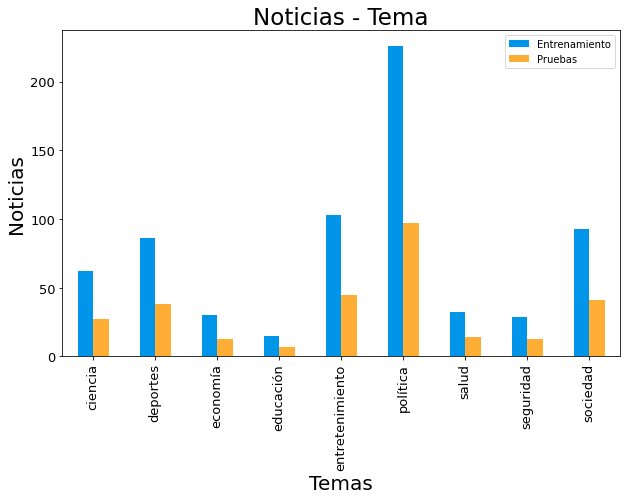

In [7]:
# 1. Contar y separar las noticias de entrenamiento según el tema en un nuevo DataFrame.
df_temas_entrenamiento = pd.DataFrame.from_dict(
    dict(df_entrenamiento.groupby('Tema').size()), 
    orient='index', 
    columns=['Entrenamiento'])

# 2. Contar y separar las noticias de pruebas según el tema en un nuevo DataFrame.
df_temas_pruebas = pd.DataFrame.from_dict(
    dict(df_pruebas.groupby('Tema').size()), 
    orient='index', 
    columns=['Pruebas'])

# 3. Obtener un `DataFrame` con el número de noticias según los temas.
df_temas = pd.concat([df_temas_entrenamiento, df_temas_pruebas], axis=1)
df_temas.to_csv('Tablas-CSV/Tabla-Noticias-Temas.csv')

# 4. Gráfica de la distribución de las noticias según el tema.
color_entrenamiento = '#0095e9'
color_pruebas = '#feae34'

temas_plot = df_temas.plot(kind='bar', figsize=(10, 6), fontsize=13, color=[color_entrenamiento, color_pruebas])
temas_plot.set_title('Noticias - Tema', fontsize=23)
temas_plot.set_xlabel('Temas', fontsize=20)
temas_plot.set_ylabel('Noticias', fontsize=20)

temas_plot.figure.savefig('Plots/Figura-Noticias-Temas.png')

### ¿Cuáles son las fuentes?

Para conocer el número de fuentes e imprimir cada una de ellas es necesario hacer los siguiente:

1. Crear una lista con todas las fuentes.
2. Eliminar todas las fuentes repetidas.
3. Imprimir todas las fuentes.
4. Imprimir el número de fuentes.

In [8]:
# Crear una lista con las fuentes procesadas.
fuentes_ls = df_datos['Fuente'].to_list()

# Eliminar valores repetidos e imprimir el número de fuentes.
fuentes_ls = list(sorted(set(fuentes_ls)))

# Imprimir todas las fuentes.
cli = cmd.Cmd()
cli.columnize(fuentes_ls, displaywidth=130)

# . Imprimir el número de fuentes.
print(f'\nNúmero de fuentes: {len(fuentes_ls)}')

20 minutos                 dos mundos                 facebook el senor lopez  la verdad es           razon                  
abc                        eco portal                 facebook unico noticias  la voz popular         record                 
abc el recreo              eje central                fifa                     lamula                 resumen latinoamericano
abc noticias               el buen tono               fisgon politico          lo que calla la tv     retroceso              
abc sociedad               el clarin                  forbes                   los replicantes        rey misterios          
actualidad rt              el coleccionista de datos  frentes politicos        marca                  sabor a merengue       
alerta digital             el dizque                  grandes medios           medio tiempo           sdp noticias           
animal politico            el economista              grupo formula            mediterraneo digital   sdpnoticias     

### Tipos de noticias según los temas.

Para obtener la cantidad de noticias falsas y verdaderas según el tema es necesario hacer lo siguiente para cada conjunto de datos:

1. Separar solo las noticias de la categoría de noticias verdaderas.
2. Agrupar las noticias por tema.
3. Contar las noticias según el tema.
4. Convertir en un diccionario el resultado del conteo.
5. Convertir en un `DataFrame` el diccionario.
6. Repetir para la categoría de noticias falsas.
7. Unir los dos `DataFrames`.
8. Graficar el `DataFrame` resultado.

Los nombres para las variables y `DataFrames` serán muy largos si se escribe el para qué se utilizan y el conjunto al que pertenecen, por lo tanto, se utilizarán los siguientes nombres:

- `df_v_e`: `DataFrame` que contiene las noticias verdaderas del conjunto de entrenamiento.
- `df_f_e`: `DataFrame` que contiene las noticias falsas del conjunto de entrenamiento.
- `df_v_p`: `DataFrame` que contiene las noticias verdaderas del conjunto de pruebas.
- `df_f_p`: `DataFrame` que contiene las noticias falsas del conjunto de pruebas.
- `df_vf_e`: `DataFrame` que contiene el conteo de todas las noticias según el tema, separadas por categoría del conjunto de entrenamiento.
- `df_vf_p`: `DataFrame` que contiene el conteo de todas las noticias según el tema, separadas por categoría del conjunto de entrenamiento.

**Conjunto de entrenamiento**

In [9]:
# CATEGORÍA: VERDADERAS.
# 1. Separar las noticias verdaderas.
df_v_e = df_entrenamiento[df_entrenamiento['Categoria'] == 'verdadera']

# 2,3,4,5. Agrupar por tema, realizar el conteo y crear un DataFrame según el conteo.
df_v_e = pd.DataFrame.from_dict(dict(df_v_e.groupby('Tema').size()), orient='index', columns=['Noticias Verdaderas'])

# CATEGORÍA: FALSAS.
# 1. Separar las noticias verdaderas.
df_f_e = df_entrenamiento[df_entrenamiento['Categoria'] == 'falsa']

# 2,3,4,5. Agrupar por tema, realizar el conteo y crear un DataFrame según el conteo.
df_f_e = pd.DataFrame.from_dict(dict(df_f_e.groupby('Tema').size()), orient='index', columns=['Noticias Falsas'])

# 7. Unir los DataFrames.
df_vf_e = pd.concat([df_v_e, df_f_e], axis=1)

**Conjunto de pruebas**

In [10]:
# CATEGORÍA: VERDADERAS.
# 1. Separar las noticias verdaderas.
df_v_p = df_pruebas[df_pruebas['Categoria'] == 'verdadera']

# 2,3,4,5. Agrupar por tema, realizar el conteo y crear un DataFrame según el conteo.
df_v_p = pd.DataFrame.from_dict(dict(df_v_p.groupby('Tema').size()), orient='index', columns=['Noticias Verdaderas'])

# CATEGORÍA: FALSAS.
# 1. Separar las noticias verdaderas.
df_f_p = df_pruebas[df_pruebas['Categoria'] == 'falsa']

# 2,3,4,5. Agrupar por tema, realizar el conteo y crear un DataFrame según el conteo.
df_f_p = pd.DataFrame.from_dict(dict(df_f_p.groupby('Tema').size()), orient='index', columns=['Noticias Falsas'])

# 7. Unir los DataFrames.
df_vf_p = pd.concat([df_v_p, df_f_p], axis=1)

**Gráficas**

Text(0, 0.5, 'Noticias')

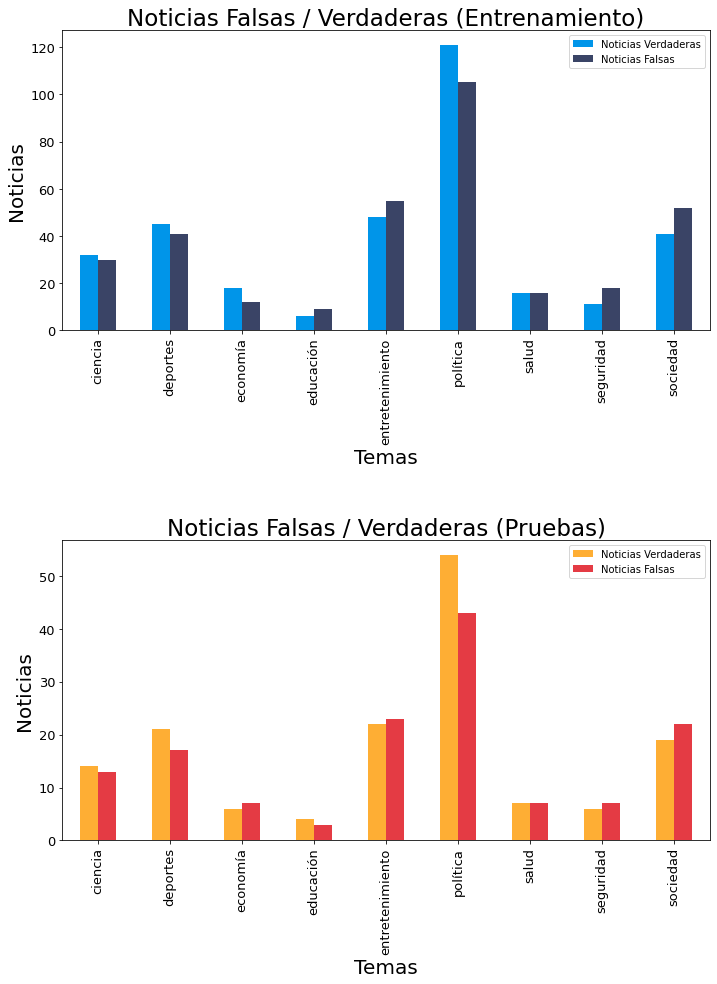

In [11]:
# Colores.
color_verdaderas_e = '#0095e9'
color_falsas_e = '#3a4466'

color_verdaderas_p = '#feae34'
color_falsas_p = '#e43b44'

# Subplots.
fig, axes = plt.subplots(nrows=2)
plt.subplots_adjust(left=0.1, right=1, top=2, hspace=.7)

# Gráfica, entrenamiento.
df_vf_e_plot = df_vf_e.plot(kind='bar', figsize=(10, 6), fontsize=13, color=[color_verdaderas_e, color_falsas_e], ax=axes[0])
df_vf_e_plot.set_title('Noticias Falsas / Verdaderas (Entrenamiento)', fontsize=23)
df_vf_e_plot.set_xlabel('Temas', fontsize=20)
df_vf_e_plot.set_ylabel('Noticias', fontsize=20)

# Gráfica, pruebas.
df_vf_p_plot = df_vf_p.plot(kind='bar', figsize=(10, 6), fontsize=13, color=[color_verdaderas_p, color_falsas_p], ax=axes[1])
df_vf_p_plot.set_title('Noticias Falsas / Verdaderas (Pruebas)', fontsize=23)
df_vf_p_plot.set_xlabel('Temas', fontsize=20)
df_vf_p_plot.set_ylabel('Noticias', fontsize=20)

## Word Cloud

*Word Cloud* es una representación visual de las palabras que forman un texto, donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

### Stopwords en español

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Algunos ejemplos son: el, la, ellos, ustedes, para, ser, etc.

Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es)

In [12]:
# Obtener las stopwords.
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('stopwords-es.json')[0])

# Se concatenan las stopwords, se crea un set para eliminar repetidos y sé genera una lista.
stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

# Se agrega la stopword 'NUMBER', debido a que no aporta nada a los datos para el análisis.
stopwords_spanish.append('number')

### Función para generar *Word Cloud*

In [13]:
def generar_word_cloud(datos, nombre_archivo, stopwords_ls=None, categoria='todas', tema='todas'):
    """
    Input:
        datos: DataFrame que contiene las noticias.
        categoria: Categoría a utilizar para los datos (True o Fake).
        tema: Tema de las noticias.
        nombre_archivo: nombre del archivo donde se guardará la nube de palabras.
    """
    
    # Guardamos las noticias según la categoría.
    df = datos if categoria == 'todas' else datos[datos['Categoria'] == categoria]

    # Guardamos las noticias según el tema.
    if tema != 'todas': df = df[df['Tema'] == tema]

    # Removemos las columnas que no son necesarias.
    df = df[['Texto']]
    
    # Imprimiremos la información de los datos utilizados.
    print(f'NOTICIAS [{tema.upper()}] {categoria.upper()}S: {df.shape[0]}')

    # Generamos una lista con todos los textos.
    news_ls = [w for w in df['Texto']]

    # Generamos un objeto str con la lista de textos (concatenamos los textos).
    news_str = ' '.join(news_ls)
    
    # Crear un tokenizer que separe solo las palabras.
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    # Tokenizar las palabras.
    words = tokenizer.tokenize(news_str)

    # Eliminar las stopwords.
    if stopwords_ls is None:
        stopwords_ls = []

    words_content = [w for w in words if w.lower() not in stopwords_ls]

    # Obtener la frequencia de las palabras de contenido sin las stopwords.
    words_content_freq = nltk.FreqDist(words_content)
    words_content_freq_dict = dict(words_content_freq)

    # Crear el word cloud.
    word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=1000).fit_words(words_content_freq_dict)

    # Guardarlo en un archivo.
    word_cloud.to_file(nombre_archivo);
    
    return None

### Generar *Word Cloud* para análisis del texto.

Se generan las *Word CLoud* para las siguientes noticias.

- Todas las noticias verdaderas de cualquier tema.
- Todas las noticias falsas de cualquier tema.

- Todas las noticias verdaderas del tema de entretenimiento.
- Todas las noticias falsas del tema de entretenimiento.

- Todas las noticias verdaderas del tema de salud.
- Todas las noticias falsas del tema de salud.

In [14]:
# Word Cloud de todas las noticias.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_True_News.png', stopwords_spanish, 'verdadera', 'todas',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Fake_News.png', stopwords_spanish, 'falsa', 'todas',)

# Word Cloud de las noticias de entretenimiento.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Entertainment_True_News.png', stopwords_spanish, 'verdadera', 'entretenimiento',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Entertainment_Fake_News.png', stopwords_spanish, 'falsa', 'entretenimiento',)

# Word Cloud de las noticias de salud.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Health_True_News.png', stopwords_spanish, 'verdadera', 'salud',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Health_Fake_News.png', stopwords_spanish, 'falsa', 'salud',)

NOTICIAS [TODAS] VERDADERAS: 491
NOTICIAS [TODAS] FALSAS: 480
NOTICIAS [ENTRETENIMIENTO] VERDADERAS: 70
NOTICIAS [ENTRETENIMIENTO] FALSAS: 78
NOTICIAS [SALUD] VERDADERAS: 23
NOTICIAS [SALUD] FALSAS: 23


<h3>Word Cloud de todas las noticias verdaderas</h3>
<img src="Word-Cloud/Word_Cloud_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas</h3>
<img src="Word-Cloud/Word_Cloud_Fake_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias verdaderas sobre entretenimiento</h3>
<img src="Word-Cloud/Word_Cloud_Entertainment_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas sobre entretenimiento</h3>
<img src="Word-Cloud/Word_Cloud_Entertainment_Fake_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias verdaderas sobre salud</h3>
<img src="Word-Cloud/Word_Cloud_Health_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas sobre salud</h3>
<img src="Word-Cloud/Word_Cloud_Health_Fake_News.png" width="400" height="400">